# <u>  PROJECT NAME:</u>
# <font color=blue>HOTEL RECOMMENDATION USING SENTIMENT ANALYSIS 

### <u> Objectives:</u>
1.Understanding sentimental analysis of Customer reviews.
        
2.Exploring and analysing of the various aspects of the dataset and recommendation based on geo-plots.


## 1.DATA COLLECTION
-	WEBSITE USED FOR THE DATA COLLECTION : tripadvisor.com
-	TOOL USED TO SCRAPE : Instant data scraper (chrome extension)
-	CITY : chikmaglur
-	HOTEL TYPE : MID-RANGE
-	ROOM TYPE AND NO. OF ADULTS : 1 ROOM , 2 ADULTS
-	TYPE OF HOTEL: lodges, hotels , resorts
-	COLUMNS INCLUDED : Reviewer Name , Hotel Name , Review ,title , Address of the Hotel  



### IMPORTING ALL MODULES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
import ast
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Vanditha Dsouza\\project\\merged_data1.csv")
df

,reviewer_name,title,review,id
0,GrandTour39221463627,Hospitable experience,The ambience amidst nature was lovely and sere...,1
1,Ashish,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,1
2,Shailesh,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,1
3,Pratham Gowda,Awesome staff,"beautiful Vibes, the service staff extremely c...",1
4,udayshankar b,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,1
...,...,...,...,...
2036,rohitprakashmathur,Nice and clean,Nice and clean property in central Chickmaglur...,9
2037,Hrkn B,Neat hotel comfortable stay,We stayed in the family suite...which was very...,9
2038,Rajbolmal,Value for money,"Pros : Good complimentary breakfast, in terms ...",9
2039,kkeshav357,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",9


In [3]:
info=pd.read_excel("C:\\Users\\Vanditha Dsouza\\project\\hotel info.xlsx")
info

,Hotel_name,Address,id
0,Vismita County,"State Highway 64 Aladgudde Cross Baskal Road, ...",1
1,Aadrika,"Milan Theatre Road Milan Theatre Annex, Chikma...",2
2,Honeydewwz Exoticaa Hotel & Resort,Hospete Tharikere Shimogga State Hwy Chickmang...,3
3,The River Tern Lodge Jungle Lodges,"Near Bhadra Forest Area, Lakvalli, Chikmagalur...",4
4,Kerehaklu,"Aldur, Chikmagalur 577111 India",5
5,Treebo Trend Maharaja Inn,Indira Gandhi Road Next To Punjab National Ban...,6
6,Treebo Trend Sunrise,"Indira Gandhi Rd Srungar Circle, Opposite To M...",7
7,Green wood Resort,"BB Hills Road Near, Inam Dattathreya Peeta, Ch...",8
8,Genx Crystal Inn Chikmangaluru,"Shankar Mutt Road, SH 57 Basavanahalli, Chikma...",9
9,Kalgreen Valley Resort,"Kalsapur Estate, Koppa Taluk, Chikmagalur 5771...",10


In [4]:
merged_df = pd.merge(df, info, on='id', how='inner')
merged_df
review=merged_df.drop(["reviewer_name","id","Address"],axis=1)
review

,title,review,Hotel_name
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County
...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru


In [5]:
review.isna().sum()

title         6
review        6
Hotel_name    0
dtype: int64

In [6]:
review.dropna(inplace=True)
review

,title,review,Hotel_name
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County
...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru


In [7]:
review["review_new"]=review["title"]+' '+review["review"]
review

,title,review,Hotel_name,review_new
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta..."
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...
...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was..."


In [8]:
review.Hotel_name.value_counts() #Number of hotels:13

Vismita County                        457
The River Tern Lodge Jungle Lodges    355
Aadrika                               264
Silent Valley Resort                  206
Kerehaklu                             148
Treebo Trend Sunrise                  112
Honeydewwz Exoticaa Hotel & Resort    107
Treebo Trend Maharaja Inn              98
Kalgreen Valley Resort                 86
Green wood Resort                      72
Genx Crystal Inn Chikmangaluru         60
Good Earth Homestay                    39
Chikmagalur Golf Club                  31
Name: Hotel_name, dtype: int64

In [9]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2040
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       2035 non-null   object
 1   review      2035 non-null   object
 2   Hotel_name  2035 non-null   object
 3   review_new  2035 non-null   object
dtypes: object(4)
memory usage: 79.5+ KB


# TEXT PREPROCESSING 
### Cleaning Reviews

In [10]:
#dropping duplicate rows
review = review.drop_duplicates() 

#dropping non-english reviews
#review = review[review['review_new'].map(lambda x: x.isascii())] since we have very less data we skip this 


#Removing numbers and special characters from the review
def remove_numbers(text):
    pattern=r'[^A-z\s]'
    return re.sub(pattern, '',text).lower()
review['clean_review']=review.review_new.apply(remove_numbers)
review

,title,review,Hotel_name,review_new,clean_review
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...,hospitable experience the ambience amidst natu...
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...,awesome stay at visnita county we stayed there...
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...,vismita county need to have a relook at the pr...
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta...",awesome staff beautiful vibes the service staf...
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...,superb resort resort is beutiful with lots of...
...,...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...,nice and clean nice and clean property in cent...
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...,neat hotel comfortable stay we stayed in the f...
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...,value for money pros good complimentary break...
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was...",awesome experience hi crystalinn team it was ...


In [11]:
#PART OF SPEECH TAGGING
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist=[]
    for word, tag in tags:
        newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return(newlist)


In [12]:
#Examples for POS tagging
print(token_stop_pos("The room was not clean"))
print(token_stop_pos("The staff was polite I had a comfortable stay"))
print(token_stop_pos("Rooms were extremely pricey"))
sia=SentimentIntensityAnalyzer()


[('The', None), ('room', 'n'), ('was', 'v'), ('not', 'r'), ('clean', 'a')]
[('The', None), ('staff', 'n'), ('was', 'v'), ('polite', 'a'), ('I', None), ('had', 'v'), ('a', None), ('comfortable', 'a'), ('stay', 'n')]
[('Rooms', 'n'), ('were', 'v'), ('extremely', 'r'), ('pricey', 'a')]


In [13]:
review['POS tagged'] = review['clean_review'].apply(token_stop_pos)
review

,title,review,Hotel_name,review_new,clean_review,POS tagged
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...,hospitable experience the ambience amidst natu...,"[(hospitable, a), (experience, n), (the, None)..."
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...,awesome stay at visnita county we stayed there...,"[(awesome, a), (stay, n), (at, None), (visnita..."
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...,vismita county need to have a relook at the pr...,"[(vismita, a), (county, n), (need, n), (to, No..."
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta...",awesome staff beautiful vibes the service staf...,"[(awesome, a), (staff, n), (beautiful, a), (vi..."
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...,superb resort resort is beutiful with lots of...,"[(superb, n), (resort, n), (resort, n), (is, v..."
...,...,...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...,nice and clean nice and clean property in cent...,"[(nice, a), (and, None), (clean, a), (nice, n)..."
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...,neat hotel comfortable stay we stayed in the f...,"[(neat, a), (hotel, n), (comfortable, a), (sta..."
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...,value for money pros good complimentary break...,"[(value, n), (for, None), (money, n), (pros, n..."
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was...",awesome experience hi crystalinn team it was ...,"[(awesome, a), (experience, n), (hi, n), (crys..."


In [14]:
review['POS tagged'].describe()
review

,title,review,Hotel_name,review_new,clean_review,POS tagged
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...,hospitable experience the ambience amidst natu...,"[(hospitable, a), (experience, n), (the, None)..."
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...,awesome stay at visnita county we stayed there...,"[(awesome, a), (stay, n), (at, None), (visnita..."
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...,vismita county need to have a relook at the pr...,"[(vismita, a), (county, n), (need, n), (to, No..."
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta...",awesome staff beautiful vibes the service staf...,"[(awesome, a), (staff, n), (beautiful, a), (vi..."
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...,superb resort resort is beutiful with lots of...,"[(superb, n), (resort, n), (resort, n), (is, v..."
...,...,...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...,nice and clean nice and clean property in cent...,"[(nice, a), (and, None), (clean, a), (nice, n)..."
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...,neat hotel comfortable stay we stayed in the f...,"[(neat, a), (hotel, n), (comfortable, a), (sta..."
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...,value for money pros good complimentary break...,"[(value, n), (for, None), (money, n), (pros, n..."
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was...",awesome experience hi crystalinn team it was ...,"[(awesome, a), (experience, n), (hi, n), (crys..."


In [15]:
#Noun Removal and None tag Removal 
def RemoveNoun(a):
    res = ast.literal_eval(str(a))
    l=[]
    for key,val in res:
        if val!='n' and val!=None :
            l.append(key.lower())
    return l
review['POS tagg without Noun'] = review.apply(lambda row: RemoveNoun(row['POS tagged']), axis=1)

review

,title,review,Hotel_name,review_new,clean_review,POS tagged,POS tagg without Noun
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...,hospitable experience the ambience amidst natu...,"[(hospitable, a), (experience, n), (the, None)...","[hospitable, amidst, was, lovely, serene, was,..."
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...,awesome stay at visnita county we stayed there...,"[(awesome, a), (stay, n), (at, None), (visnita...","[awesome, visnita, stayed, awesome, is, so, ca..."
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...,vismita county need to have a relook at the pr...,"[(vismita, a), (county, n), (need, n), (to, No...","[vismita, have, pricing, is, extremely, pricey..."
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta...",awesome staff beautiful vibes the service staf...,"[(awesome, a), (staff, n), (beautiful, a), (vi...","[awesome, beautiful, vibes, extremely, courteo..."
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...,superb resort resort is beutiful with lots of...,"[(superb, n), (resort, n), (resort, n), (is, v...","[is, beutiful, was, large, required, amenities..."
...,...,...,...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...,nice and clean nice and clean property in cent...,"[(nice, a), (and, None), (clean, a), (nice, n)...","[nice, clean, clean, central, have, small, ful..."
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...,neat hotel comfortable stay we stayed in the f...,"[(neat, a), (hotel, n), (comfortable, a), (sta...","[neat, comfortable, stayed, was, very, neat, w..."
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...,value for money pros good complimentary break...,"[(value, n), (for, None), (money, n), (pros, n...","[good, complimentary, best, is, awesome, itali..."
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was...",awesome experience hi crystalinn team it was ...,"[(awesome, a), (experience, n), (hi, n), (crys...","[awesome, was, nice, stay, team, was, just, aw..."


In [16]:
#Lemmatize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]
review['final_review']=review['POS tagg without Noun'].apply(lambda x: " ".join(lemmatize_text(x)))
review

,title,review,Hotel_name,review_new,clean_review,POS tagged,POS tagg without Noun,final_review
0,Hospitable experience,The ambience amidst nature was lovely and sere...,Vismita County,Hospitable experience The ambience amidst natu...,hospitable experience the ambience amidst natu...,"[(hospitable, a), (experience, n), (the, None)...","[hospitable, amidst, was, lovely, serene, was,...",hospitable amidst wa lovely serene wa very fri...
1,Awesome stay at Visnita county,We stayed there for 3 days ..it's awesome expe...,Vismita County,Awesome stay at Visnita county We stayed there...,awesome stay at visnita county we stayed there...,"[(awesome, a), (stay, n), (at, None), (visnita...","[awesome, visnita, stayed, awesome, is, so, ca...",awesome visnita stayed awesome is so calm beau...
2,Vismita County need to have a relook at the pr...,The property is extremely pricey with respect ...,Vismita County,Vismita County need to have a relook at the pr...,vismita county need to have a relook at the pr...,"[(vismita, a), (county, n), (need, n), (to, No...","[vismita, have, pricing, is, extremely, pricey...",vismita have pricing is extremely pricey espec...
3,Awesome staff,"beautiful Vibes, the service staff extremely c...",Vismita County,"Awesome staff beautiful Vibes, the service sta...",awesome staff beautiful vibes the service staf...,"[(awesome, a), (staff, n), (beautiful, a), (vi...","[awesome, beautiful, vibes, extremely, courteo...",awesome beautiful vibe extremely courteous wa ...
4,Superb Resort,Resort is Beutiful with Lot's of Greenaries a...,Vismita County,Superb Resort Resort is Beutiful with Lot's o...,superb resort resort is beutiful with lots of...,"[(superb, n), (resort, n), (resort, n), (is, v...","[is, beutiful, was, large, required, amenities...",is beutiful wa large required amenity extremel...
...,...,...,...,...,...,...,...,...
2036,Nice and clean,Nice and clean property in central Chickmaglur...,Genx Crystal Inn Chikmangaluru,Nice and clean Nice and clean property in cent...,nice and clean nice and clean property in cent...,"[(nice, a), (and, None), (clean, a), (nice, n)...","[nice, clean, clean, central, have, small, ful...",nice clean clean central have small full is ne...
2037,Neat hotel comfortable stay,We stayed in the family suite...which was very...,Genx Crystal Inn Chikmangaluru,Neat hotel comfortable stay We stayed in the f...,neat hotel comfortable stay we stayed in the f...,"[(neat, a), (hotel, n), (comfortable, a), (sta...","[neat, comfortable, stayed, was, very, neat, w...",neat comfortable stayed wa very neat well main...
2038,Value for money,"Pros : Good complimentary breakfast, in terms ...",Genx Crystal Inn Chikmangaluru,Value for money Pros : Good complimentary brea...,value for money pros good complimentary break...,"[(value, n), (for, None), (money, n), (pros, n...","[good, complimentary, best, is, awesome, itali...",good complimentary best is awesome italian con...
2039,awesome experience,"Hi CrystalInn Team, It was nice to stay with ...",Genx Crystal Inn Chikmangaluru,"awesome experience Hi CrystalInn Team, It was...",awesome experience hi crystalinn team it was ...,"[(awesome, a), (experience, n), (hi, n), (crys...","[awesome, was, nice, stay, team, was, just, aw...",awesome wa nice stay team wa just awesome serv...


In [17]:
df_analysis = pd.DataFrame()
df_analysis=review[["final_review","Hotel_name"]]
df_analysis

,final_review,Hotel_name
0,hospitable amidst wa lovely serene wa very fri...,Vismita County
1,awesome visnita stayed awesome is so calm beau...,Vismita County
2,vismita have pricing is extremely pricey espec...,Vismita County
3,awesome beautiful vibe extremely courteous wa ...,Vismita County
4,is beutiful wa large required amenity extremel...,Vismita County
...,...,...
2036,nice clean clean central have small full is ne...,Genx Crystal Inn Chikmangaluru
2037,neat comfortable stayed wa very neat well main...,Genx Crystal Inn Chikmangaluru
2038,good complimentary best is awesome italian con...,Genx Crystal Inn Chikmangaluru
2039,awesome wa nice stay team wa just awesome serv...,Genx Crystal Inn Chikmangaluru


In [20]:
from nltk.probability import FreqDist
corpus = ' '.join(df_analysis['final_review'])
# Tokenize the corpus into words
tokens = word_tokenize(corpus)

# Calculate the frequency distribution of words
fdist = FreqDist(tokens)

# Create a DataFrame from the frequency distribution
freq_df = pd.DataFrame(fdist.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
freq_df.head(60)

,Word,Frequency
28,is,3368
2,wa,2807
5,very,2061
45,good,1873
193,are,1557
36,were,1174
19,not,890
78,had,800
83,great,753
33,have,748


In [47]:
#Create a custom list of words that are meaningless for analysis
stopwords1=["is","wa","very","are","not","great","also","so","just","only","were","had","have","be","ha","i","visit","here","other","get","go","there","do","away","overall","too","much","out","made","vimita","been","make","back"]

### SENTIMENT ANALYSIS

In [23]:
def SentimentAnalyzer(text):
    sid_obj= SentimentIntensityAnalyzer()
    return(sid_obj.polarity_scores(text)) 
df_analysis["polarity_score"]=df_analysis["final_review"].apply(SentimentAnalyzer)

In [27]:
def get(dict):
    return(dict.get("compound"))
def analysis(score):
    if score<=-0.05:
        return("negative")
    elif score>=0.05:
        return("positive")
    else:
        return("neutral")
df_analysis["compound"]=df_analysis.polarity_score.apply(get)
df_analysis["emotion"]=df_analysis.compound.apply(analysis)
df_analysis

,final_review,Hotel_name,polarity_score,compound,emotion
0,hospitable amidst wa lovely serene wa very fri...,Vismita County,"{'neg': 0.047, 'neu': 0.416, 'pos': 0.537, 'co...",0.9702,positive
1,awesome visnita stayed awesome is so calm beau...,Vismita County,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.9780,positive
2,vismita have pricing is extremely pricey espec...,Vismita County,"{'neg': 0.066, 'neu': 0.696, 'pos': 0.238, 'co...",0.6901,positive
3,awesome beautiful vibe extremely courteous wa ...,Vismita County,"{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound...",0.9749,positive
4,is beutiful wa large required amenity extremel...,Vismita County,"{'neg': 0.0, 'neu': 0.335, 'pos': 0.665, 'comp...",0.9575,positive
...,...,...,...,...,...
2036,nice clean clean central have small full is ne...,Genx Crystal Inn Chikmangaluru,"{'neg': 0.0, 'neu': 0.232, 'pos': 0.768, 'comp...",0.9764,positive
2037,neat comfortable stayed wa very neat well main...,Genx Crystal Inn Chikmangaluru,"{'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'comp...",0.9616,positive
2038,good complimentary best is awesome italian con...,Genx Crystal Inn Chikmangaluru,"{'neg': 0.0, 'neu': 0.362, 'pos': 0.638, 'comp...",0.9788,positive
2039,awesome wa nice stay team wa just awesome serv...,Genx Crystal Inn Chikmangaluru,"{'neg': 0.0, 'neu': 0.404, 'pos': 0.596, 'comp...",0.9451,positive


In [34]:
df_analysis.emotion.value_counts()

positive    1921
negative     107
neutral        7
Name: emotion, dtype: int64

In [37]:
# Group by hotel_name and review_sentiment and then unstack to pivot sentiment values as columns
grouped = df_analysis.groupby(['Hotel_name', 'emotion']).size().unstack(fill_value=0)

# Rename the columns
grouped.columns = ['negative', 'neutral', 'positive']

# Reset index to make hotel_name a column
result_df = grouped.reset_index()

# Calculate the total reviews for each hotel
result_df['total_reviews'] = result_df['positive'] + result_df['negative'] + result_df['neutral']

# Calculate the average percentage of positive, negative, and neutral reviews
result_df['avg_positive'] = (result_df['positive'] / result_df['total_reviews']) 
result_df['avg_negative'] = (result_df['negative'] / result_df['total_reviews']) 
result_df['avg_neutral'] = (result_df['neutral'] / result_df['total_reviews']) 
result_df

,Hotel_name,negative,neutral,positive,total_reviews,avg_positive,avg_negative,avg_neutral
0,Aadrika,10,0,254,264,0.962121,0.037879,0.000000
1,Chikmagalur Golf Club,3,0,28,31,0.903226,0.096774,0.000000
2,Genx Crystal Inn Chikmangaluru,6,0,54,60,0.900000,0.100000,0.000000
3,Good Earth Homestay,2,0,37,39,0.948718,0.051282,0.000000
4,Green wood Resort,4,2,66,72,0.916667,0.055556,0.027778
5,Honeydewwz Exoticaa Hotel & Resort,1,0,106,107,0.990654,0.009346,0.000000
6,Kalgreen Valley Resort,3,1,82,86,0.953488,0.034884,0.011628
7,Kerehaklu,1,0,147,148,0.993243,0.006757,0.000000
8,Silent Valley Resort,39,2,165,206,0.800971,0.189320,0.009709
9,The River Tern Lodge Jungle Lodges,10,0,345,355,0.971831,0.028169,0.000000


### WORD CLOUD

In [51]:
stopwords1

['is',
 'wa',
 'very',
 'are',
 'not',
 'great',
 'also',
 'so',
 'just',
 'only',
 'were',
 'had',
 'have',
 'be',
 'ha',
 'i',
 'visit',
 'here',
 'other',
 'get',
 'go',
 'there',
 'do',
 'away',
 'overall',
 'too',
 'much',
 'out',
 'made',
 'vimita',
 'been',
 'make',
 'back']

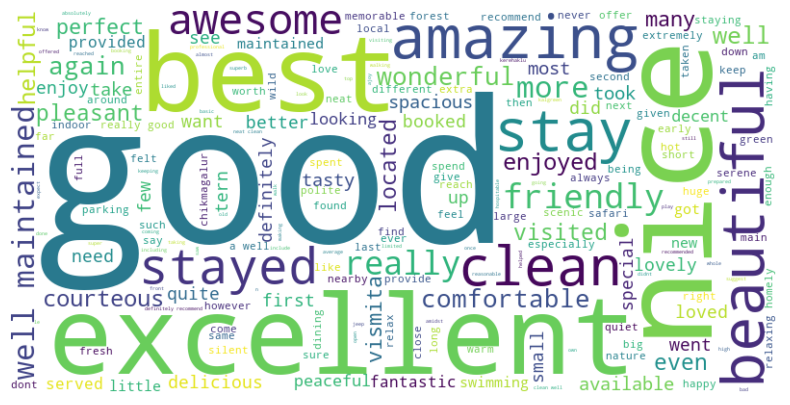

In [48]:

# Filter dataframe to include only positive reviews
positive_reviews = df_analysis[df_analysis['emotion'] == 'positive']

# Combine all reviews into a single string
all_reviews = ' '.join(positive_reviews['final_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords1).generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

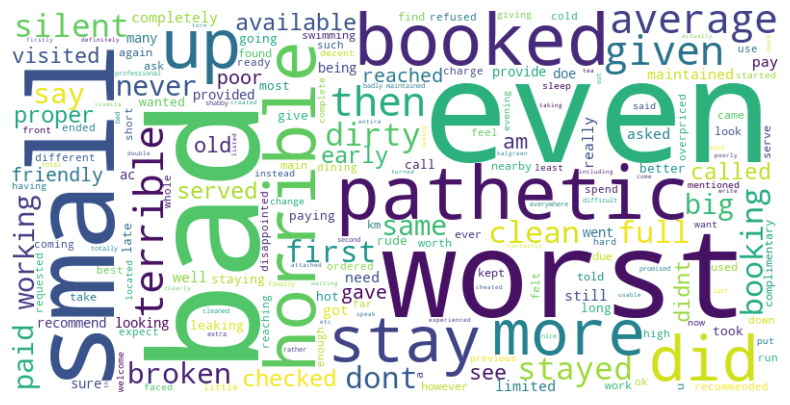

In [50]:
# Filter dataframe to include only positive reviews
negative_reviews = df_analysis[df_analysis['emotion'] == 'negative']

# Combine all reviews into a single string
all_reviews = ' '.join(negative_reviews['final_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords1).generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()